In [86]:
pip install pillow

In [87]:
pip install numpy

In [88]:
pip install pandas

In [92]:
import matplotlib.pyplot as plt

In [7]:
pip install Dlib

In [90]:
pip install face-recognition


In [91]:
import face_recognition
import PIL.ImageDraw
import PIL.Image
from google.colab import files
from google.colab import drive
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
import cv2





In [183]:
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


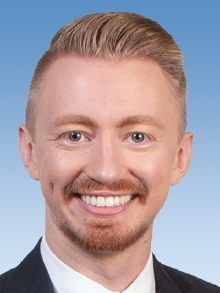

In [185]:
img = cv2.imread("/content/gdrive/MyDrive/BDA/Open eyes/open1.png")
cv2_imshow(img)

In [186]:
def landmarking (input_image):
  face_landmarks = face_recognition.face_landmarks(input_image)

  output_image = PIL.Image.fromarray(input_image)
  draw = PIL.ImageDraw.Draw(output_image)

  landmark = face_landmarks[0].get('left_eye')
  landmark2 = face_landmarks[0].get('right_eye')

  for loc in landmark:
    x,y = loc
    draw.rectangle((x,y,x+2,y+2),outline='blue')

  for loc2 in landmark2:
    x,y = loc2
    draw.rectangle((x,y,x+2,y+2),outline='blue')

  plt.imshow(output_image)

  arr = np.asarray(landmark)
  fla_arr = arr.flatten()
  distance = fla_arr[9]-fla_arr[3]

  if distance <= 3 :
      print("Driver is sleepyy , stop the Vehicle")
  else :
      print("Driver is awake,Have a nice journey ")

Driver is awake,Have a nice journey 


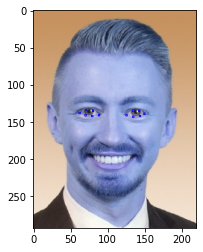

In [187]:
landmarking(img)

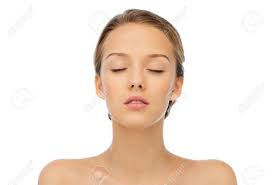

In [188]:
img2 = cv2.imread("/content/gdrive/MyDrive/BDA/Closed Eyes/close1.jpg")
cv2_imshow(img2)

Driver is sleepyy , stop the Vehicle


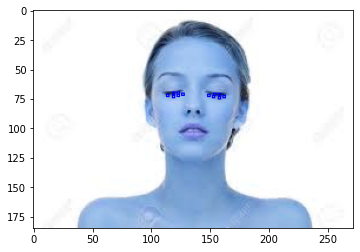

In [189]:
landmarking(img2)

In [190]:
data = pd.read_excel("/content/gdrive/MyDrive/BDA/Images.xlsx", header=0)
data.head()

Image Path Actual state
0  /content/gdrive/MyDrive/BDA/Closed Eyes/close1...  Closed eyes
1  /content/gdrive/MyDrive/BDA/Closed Eyes/close1...  Closed eyes
2  /content/gdrive/MyDrive/BDA/Closed Eyes/close1...  Closed eyes
3  /content/gdrive/MyDrive/BDA/Closed Eyes/close1...  Closed eyes
4  /content/gdrive/MyDrive/BDA/Closed Eyes/close1...  Closed eyes

In [191]:
data.describe()

Image Path Actual state
count                                                  53           53
unique                                                 53            2
top     /content/gdrive/MyDrive/BDA/Closed Eyes/close2...  Closed eyes
freq                                                    1           28

In [192]:
Path = data['Image Path']
State = data['Actual state']

In [193]:
dataf = pd.DataFrame.from_dict(Path)
dataf.head()

Image Path
0  /content/gdrive/MyDrive/BDA/Closed Eyes/close1...
1  /content/gdrive/MyDrive/BDA/Closed Eyes/close1...
2  /content/gdrive/MyDrive/BDA/Closed Eyes/close1...
3  /content/gdrive/MyDrive/BDA/Closed Eyes/close1...
4  /content/gdrive/MyDrive/BDA/Closed Eyes/close1...

In [194]:
dataf['State'] = State
dataf.tail()

Image Path      State
48   /content/gdrive/MyDrive/BDA/Open eyes/open5.jpg  Open eyes
49   /content/gdrive/MyDrive/BDA/Open eyes/open6.jpg  Open eyes
50  /content/gdrive/MyDrive/BDA/Open eyes/open7.webp  Open eyes
51   /content/gdrive/MyDrive/BDA/Open eyes/open8.jpg  Open eyes
52   /content/gdrive/MyDrive/BDA/Open eyes/open9.jpg  Open eyes

In [198]:
def detecting (input_image):
  input_image = cv2.resize(input_image, (300,300))
  face_landmarks = face_recognition.face_landmarks(input_image)

  output_image = PIL.Image.fromarray(input_image)
  draw = PIL.ImageDraw.Draw(output_image)

  landmark = face_landmarks[0].get('left_eye')
  landmark2 = face_landmarks[0].get('right_eye')

  for loc in landmark:
    x,y = loc
    draw.rectangle((x,y,x+2,y+2),outline='blue')

  for loc2 in landmark2:
    x,y = loc2
    draw.rectangle((x,y,x+2,y+2),outline='blue')

  arr = np.asarray(landmark)
  fla_arr = arr.flatten()
  distance = fla_arr[9]-fla_arr[3]

  if distance <= 3 :
    return 'Closed eyes'
  else :
    return 'Open eyes'


In [199]:
test1 = dataf['Image Path'].iloc[0]
print(test1)
print(detecting(cv2.imread(test1)))

/content/gdrive/MyDrive/BDA/Closed Eyes/close1.jpg
Closed eyes


In [201]:
pol = lambda x: detecting(cv2.imread(x))
dataf['Predicted_State'] = dataf['Image Path'].apply(pol)
dataf

IndexError: ignored

In [155]:
count = {}
for text in dataf['State']:
  if text == None: 
    text = 'None'
  count[text] = count.get(text, 0) + 1
count

{'Closed eyes': 28, 'Open eyes': 25}

<BarContainer object of 2 artists>

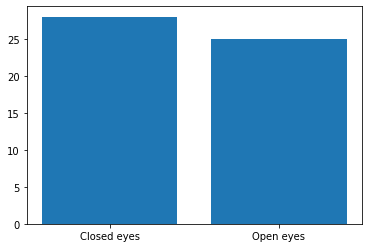

In [156]:
keys = count.keys()
values = count.values()
plt.bar(keys, values)